In [ ]:
# Run below commands
!sudo apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #Install java
!wget -q https://archive.apache.org/dist/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz ## Install Apache Spark
!tar xf spark-3.4.1-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark==3.4.1

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,885 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,088 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,439 kB]
Hit:13 https://ppa.launc

In [ ]:
import os
from pyspark.sql import SparkSession
# Define Java and Spark home path in Google Colab
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark import SparkConf, SparkContext
from datetime import datetime, date, timedelta
from dateutil import relativedelta
from pyspark.sql import SQLContext, Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import *
from pyspark.sql.functions import to_timestamp, to_date
from pyspark.sql import functions as F
from pyspark.sql.functions import collect_list, collect_set, concat, first, array_distinct, col, size, expr, lag
from pyspark.sql import DataFrame
import random

In [ ]:
from pyspark.sql.functions import year, avg, min, max, abs

In [ ]:
# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("FinalProject") \
    .config("spark.jars.packages", "com.crealytics:spark-excel_2.12:0.13.1") \
    .getOrCreate()


## Import Mercari Data

In [124]:
# Adidias Sambas For Sale
as_sale = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/sambas for sale.csv")
as_sale = as_sale.dropna(how='any')
as_sale.show(2)

# Adidas Sambas Sold
as_sold = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/sambas sold.csv")
as_sold = as_sold.dropna(how='any')
as_sold.show(2)

# Adidas Campus 00s For Sale
ac_sale = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/campus 00s for sale.csv")
ac_sale = ac_sale.dropna(how='any')
ac_sale.show(2)

# Adidas Campus 00s Sold
ac_sold = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/campus 00s sold.csv")
ac_sold = ac_sold.dropna(how='any')
ac_sold.show(2)

# Reebok Club C For Sale
rc_sale = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/reeboks for sale.csv")
rc_sale = rc_sale.dropna(how='any')
rc_sale.show(2)

# Reebok Club C Sold
rc_sold = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/reeboks sold.csv")
rc_sold = rc_sold.dropna(how='any')
rc_sold.show(2)

+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|               title|     product|selling price|original price|discount|date posted |likes|sold|
+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|Adidas - Samba OG...|Adidas Samba|         67.0|          67.0|     0.0|    06/05/24|    3|   0|
|Adidas - Samba OG...|Adidas Samba|         66.0|          66.0|     0.0|    06/03/24|    9|   0|
+--------------------+------------+-------------+--------------+--------+------------+-----+----+
only showing top 2 rows

+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|               title|     product|selling price|original price|discount|date posted |likes|sold|
+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|Men's Adidas Samb...|Adidas Samba|        105.0|         130.0|    25.0|    05/14/24|    4| 

In [125]:
from functools import reduce
from pyspark.sql import DataFrame

def union_all(*dfs):
    return reduce(DataFrame.union, dfs)

# Use the function to union multiple DataFrames
as_listings = union_all(as_sale, as_sold)
ac_listings = union_all(ac_sale, ac_sold)
rc_listings = union_all(rc_sale, rc_sold)

# Show the result
as_listings.show(2)
ac_listings.show(2)
rc_listings.show(2)


+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|               title|     product|selling price|original price|discount|date posted |likes|sold|
+--------------------+------------+-------------+--------------+--------+------------+-----+----+
|Adidas - Samba OG...|Adidas Samba|         67.0|          67.0|     0.0|    06/05/24|    3|   0|
|Adidas - Samba OG...|Adidas Samba|         66.0|          66.0|     0.0|    06/03/24|    9|   0|
+--------------------+------------+-------------+--------------+--------+------------+-----+----+
only showing top 2 rows

+--------------------+-----------------+-------------+--------------+--------+------------+-----+----+
|               title|          product|selling price|original price|discount|date posted |likes|sold|
+--------------------+-----------------+-------------+--------------+--------+------------+-----+----+
|Adidas Campus 00s...|Adidas Campus 00s|        99.27|         110.0|   10.73|

In [126]:
as_listings = as_listings.withColumnRenamed("date posted ", "posted_date").withColumnRenamed("likes", "listing_likes")
as_listings = as_listings.withColumn("posted_date", to_date(col("posted_date"), "MM/dd/yy"))
as_listings.show(2)

ac_listings = ac_listings.withColumnRenamed("date posted ", "posted_date").withColumnRenamed("likes", "listing_likes")
ac_listings = ac_listings.withColumn("posted_date", to_date(col("posted_date"), "MM/dd/yy"))
ac_listings.show(2)

rc_listings = rc_listings.withColumnRenamed("date posted ", "posted_date").withColumnRenamed("likes", "listing_likes")
rc_listings = rc_listings.withColumn("posted_date", to_date(col("posted_date"), "MM/dd/yy"))
rc_listings.show(2)

+--------------------+------------+-------------+--------------+--------+-----------+-------------+----+
|               title|     product|selling price|original price|discount|posted_date|listing_likes|sold|
+--------------------+------------+-------------+--------------+--------+-----------+-------------+----+
|Adidas - Samba OG...|Adidas Samba|         67.0|          67.0|     0.0| 2024-06-05|            3|   0|
|Adidas - Samba OG...|Adidas Samba|         66.0|          66.0|     0.0| 2024-06-03|            9|   0|
+--------------------+------------+-------------+--------------+--------+-----------+-------------+----+
only showing top 2 rows

+--------------------+-----------------+-------------+--------------+--------+-----------+-------------+----+
|               title|          product|selling price|original price|discount|posted_date|listing_likes|sold|
+--------------------+-----------------+-------------+--------------+--------+-----------+-------------+----+
|Adidas Campus 

## Import TikTok Data

In [127]:
# Adidas Sambas
as_tiktok = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/tiktok_adidas_samba.csv")

as_tiktok.show(2)

# Adidas Campus 00s
ac_tiktok = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/tiktok_adidas_campus.csv")

ac_tiktok.show(2)

# Reebok Club C
rc_tiktok = spark\
  .read\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .csv("/content/tiktok_reebok.csv")

rc_tiktok.show(2)

+--------+-----------+------+--------+-----+------+-------+
|    user|posted date| likes|comments|saves|shares|  views|
+--------+-----------+------+--------+-----+------+-------+
|jahinluv|     1/2/23|118000|     648| 8810|  5158|2300000|
|kixplore|    1/28/23| 45100|     240| 3834|  1096|1400000|
+--------+-----------+------+--------+-----+------+-------+
only showing top 2 rows

+--------+-----------+-------+--------+------+------+--------+
|    user|posted date|  likes|comments| saves|shares|   views|
+--------+-----------+-------+--------+------+------+--------+
|naornita| 04/08/2024|   9166|      45|   568|   160|  208200|
|aavajean| 02/24/2024|1300000|    3234|183500| 65100|10900000|
+--------+-----------+-------+--------+------+------+--------+
only showing top 2 rows

+--------------+-----------+-----+--------+-----+------+------+
|          user|posted date|likes|comments|saves|shares| views|
+--------------+-----------+-----+--------+-----+------+------+
|chooseyourglow|    

In [128]:
# Convert 'posted date' to a date type
as_tiktok = as_tiktok.withColumn("posted date", to_date(col("posted date"), "M/d/yy"))
as_tiktok = as_tiktok.withColumnRenamed("posted date", "posted_date")

as_tiktok.show(2)

# Convert 'posted date' to a date type
ac_tiktok = ac_tiktok.withColumn("posted date", to_date(col("posted date"), "MM/dd/yyyy"))
ac_tiktok = ac_tiktok.withColumnRenamed("posted date", "posted_date")

ac_tiktok.show(2)

# Convert 'posted date' to a date type
rc_tiktok = rc_tiktok.withColumn("posted date", to_date(col("posted date"), "M/d/yy"))
rc_tiktok = rc_tiktok.withColumnRenamed("posted date", "posted_date")

rc_tiktok.show(2)

+--------+-----------+------+--------+-----+------+-------+
|    user|posted_date| likes|comments|saves|shares|  views|
+--------+-----------+------+--------+-----+------+-------+
|jahinluv| 2023-01-02|118000|     648| 8810|  5158|2300000|
|kixplore| 2023-01-28| 45100|     240| 3834|  1096|1400000|
+--------+-----------+------+--------+-----+------+-------+
only showing top 2 rows

+--------+-----------+-------+--------+------+------+--------+
|    user|posted_date|  likes|comments| saves|shares|   views|
+--------+-----------+-------+--------+------+------+--------+
|naornita| 2024-04-08|   9166|      45|   568|   160|  208200|
|aavajean| 2024-02-24|1300000|    3234|183500| 65100|10900000|
+--------+-----------+-------+--------+------+------+--------+
only showing top 2 rows

+--------------+-----------+-----+--------+-----+------+------+
|          user|posted_date|likes|comments|saves|shares| views|
+--------------+-----------+-----+--------+-----+------+------+
|chooseyourglow| 202

## Plotting Adidas Sambas TikTok Engagement x Selling Price

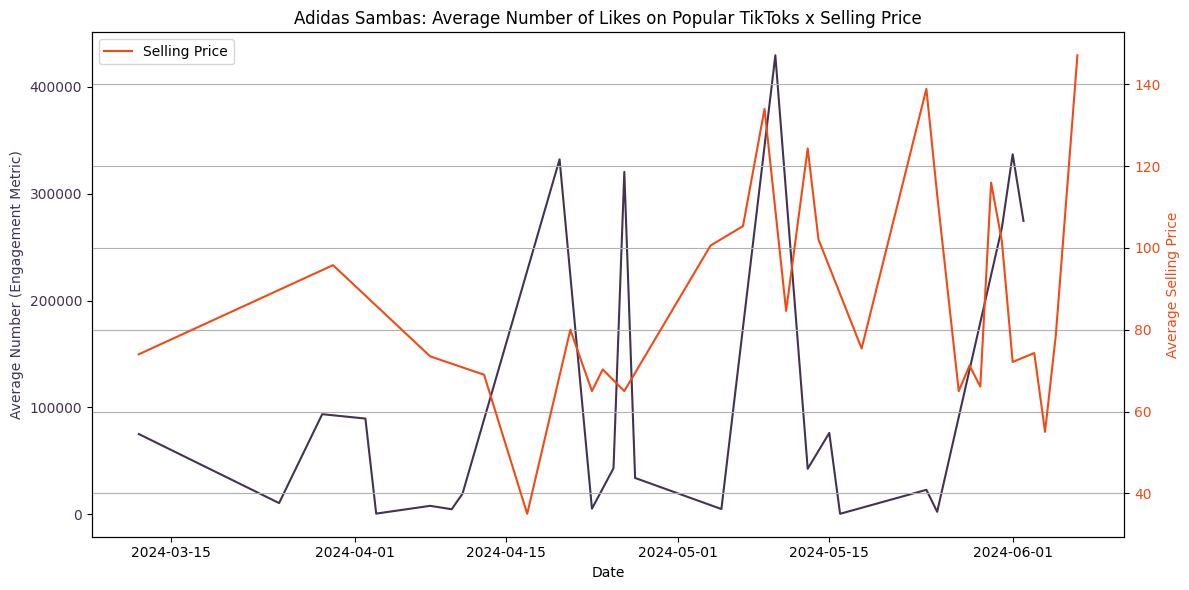

In [129]:
import pandas as pd
import datetime

# Group by 'posted date' and sum the 'likes', 'comments', and 'views'
aggregated_df = as_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

agg_listings = as_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Collect the data to the driver
result_data = aggregated_df.sort("posted_date").toPandas()
result_data['posted_date'] = pd.to_datetime(result_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = listings_data['posted_date'].min().date()

# date_range = pd.date_range(start='2024-01-01', end='2024-06-06', freq='D').strftime('%Y-%m-%d')
result_data = result_data[result_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
color = '#433252'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Number (Engagement Metric)', color=color)
ax1.plot(result_data['posted_date'], result_data['mean_likes'], color=color, label='Likes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = '#F14A16'
ax2.set_ylabel('Average Selling Price', color=color)
ax2.plot(listings_data['posted_date'], listings_data['mean_selling_price'], color=color, label='Selling Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Adidas Sambas: Average Number of Likes on Popular TikToks x Selling Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Plotting Adidas Sambas TikTok Engagement x Selling Price Moving Averages (Price Lagged)

<ipython-input-142-db48e4095b31>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['likes_moving_avg'] = tiktok_data['mean_likes'].rolling(window=window_size_likes).mean()
<ipython-input-142-db48e4095b31>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['likes_lagged_moving_avg'] = tiktok_data['likes_moving_avg'].shift(lag_periods_likes)


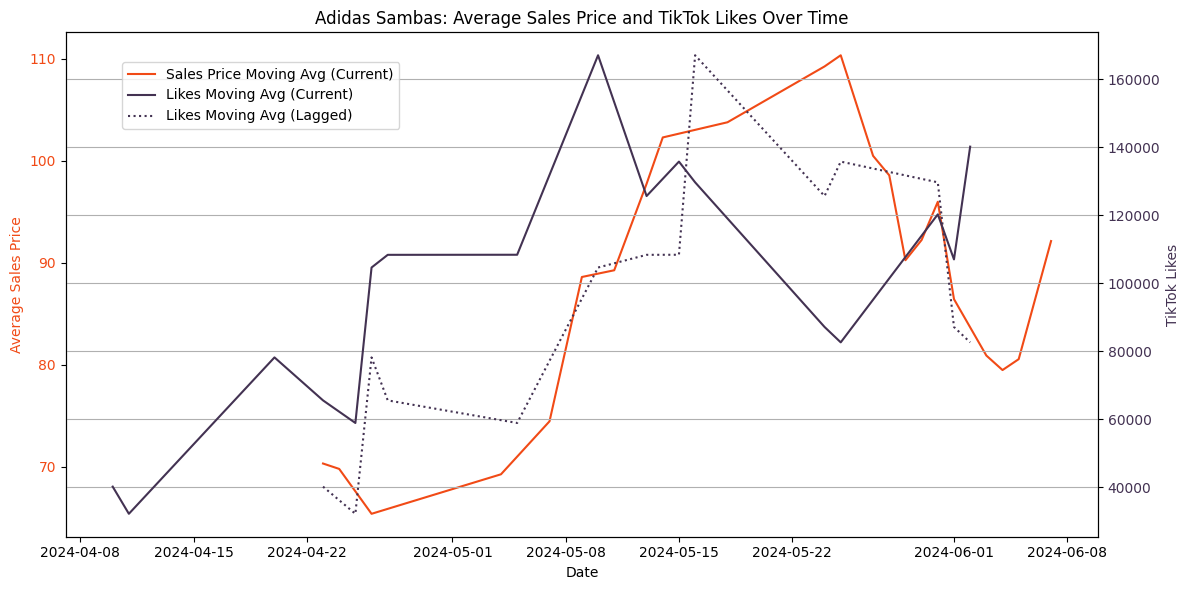

In [142]:
import pandas as pd
import datetime

# Group by 'posted date' and sum the 'likes', 'comments', and 'views'
aggregated_df = as_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

agg_listings = as_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Sort the TikTok data
tiktok_data = aggregated_df.sort("posted_date").toPandas()
tiktok_data['posted_date'] = pd.to_datetime(tiktok_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = listings_data['posted_date'].min().date()
tiktok_data = tiktok_data[tiktok_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]

# Calculate the moving average of sales prices
window_size = 7  # For example, a 7-day moving average
listings_data['moving_avg'] = listings_data['mean_selling_price'].rolling(window=window_size).mean()

# Calculate moving average for likes
window_size_likes = 7
tiktok_data['likes_moving_avg'] = tiktok_data['mean_likes'].rolling(window=window_size_likes).mean()

# Calculate lagged moving average for likes
lag_periods_likes = 3
tiktok_data['likes_lagged_moving_avg'] = tiktok_data['likes_moving_avg'].shift(lag_periods_likes)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sales prices moving averages
color = '#F14A16'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sales Price', color=color)
ax1.plot(listings_data.posted_date, listings_data['moving_avg'], label='Sales Price Moving Avg (Current)', color=color)
# ax1.plot(listings_data.posted_date, listings_data['lagged_moving_avg'], label='Sales Price Moving Avg (Lagged)', linestyle='--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the likes data
ax2 = ax1.twinx()
color = '#433252'
ax2.set_ylabel('TikTok Likes', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_moving_avg'], label='Likes Moving Avg (Current)', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_lagged_moving_avg'], label='Likes Moving Avg (Lagged)', linestyle=':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Adidas Sambas: Average Sales Price and TikTok Likes Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)

# Show plot
plt.show()

## Plotting Adidas Campus 00s TikTok Engagement x Selling Price

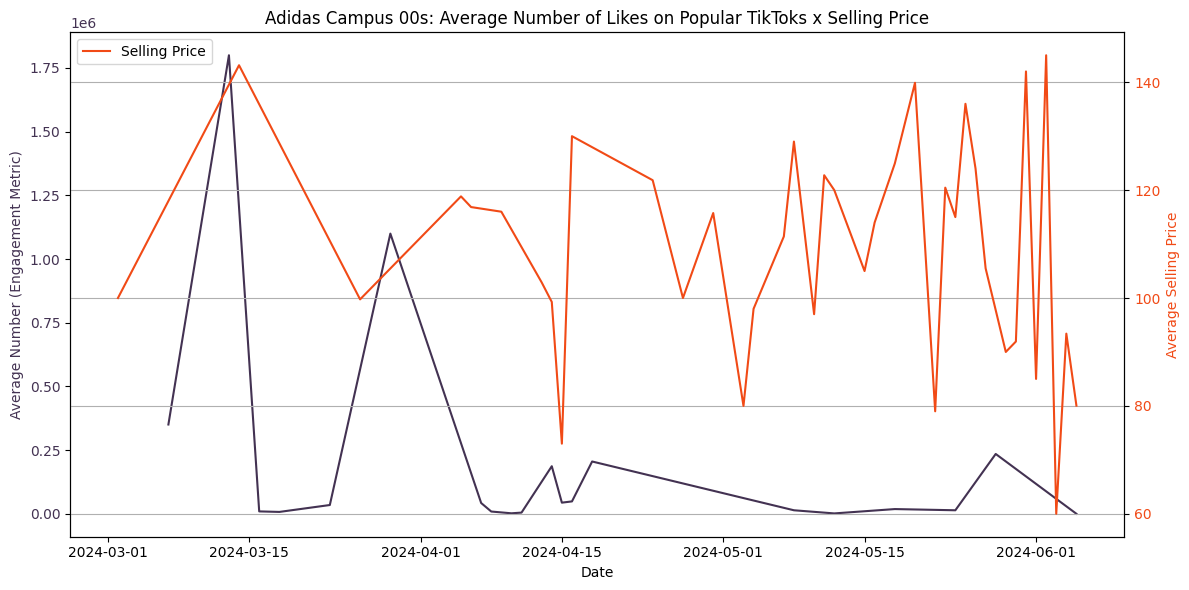

In [131]:
# Group by 'posted date' and sum the 'likes', 'comments', and 'views'
aggregated_df = ac_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

agg_listings = ac_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Collect the data to the driver
result_data = aggregated_df.sort("posted_date").toPandas()
result_data['posted_date'] = pd.to_datetime(result_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = listings_data['posted_date'].min().date()

# date_range = pd.date_range(start='2024-01-01', end='2024-06-06', freq='D').strftime('%Y-%m-%d')
result_data = result_data[result_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
color = '#433252'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Number (Engagement Metric)', color=color)
ax1.plot(result_data['posted_date'], result_data['mean_likes'], color=color, label='Likes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = '#F14A16'
ax2.set_ylabel('Average Selling Price', color=color)
ax2.plot(listings_data['posted_date'], listings_data['mean_selling_price'], color=color, label='Selling Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Adidas Campus 00s: Average Number of Likes on Popular TikToks x Selling Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plotting Adidas Campus 00s TikTok Engagement x Selling Price Moving Averages (Price Lagged)

<ipython-input-121-35e446ce5266>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['likes_moving_avg'] = tiktok_data['mean_likes'].rolling(window=window_size_likes).mean()
<ipython-input-121-35e446ce5266>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok_data['likes_lagged_moving_avg'] = tiktok_data['likes_moving_avg'].shift(lag_periods_likes)


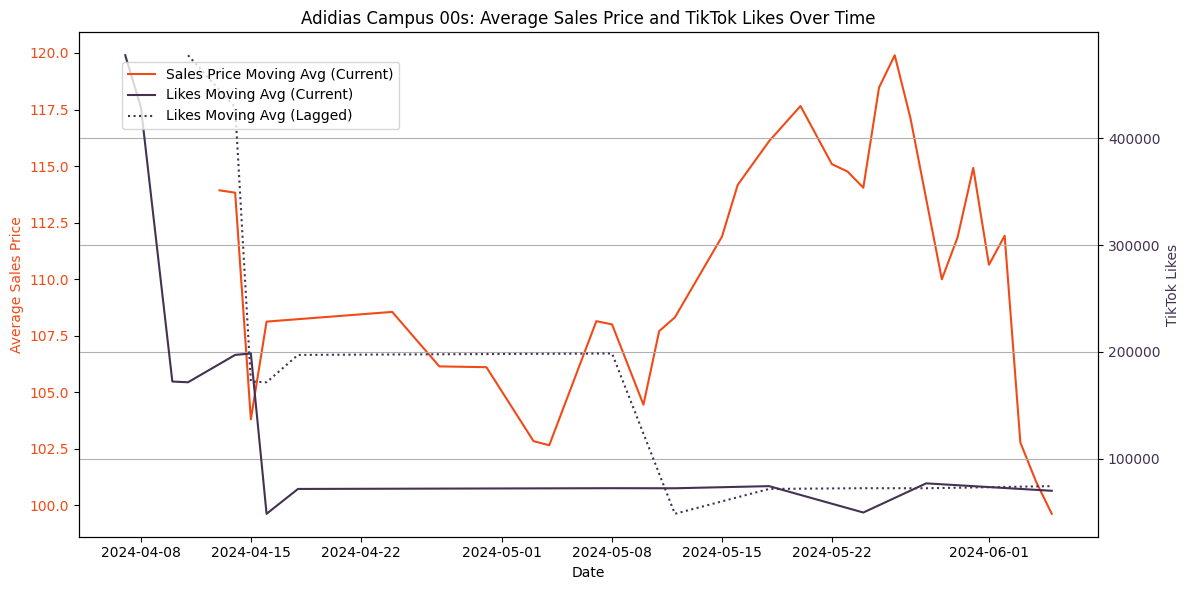

In [121]:
# Group by 'posted date' and average the 'likes', 'comments', and 'views'
aggregated_df = ac_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

# Group by 'posted date' and average the selling price
agg_listings = ac_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Sort the TikTok data
tiktok_data = aggregated_df.sort("posted_date").toPandas()
tiktok_data['posted_date'] = pd.to_datetime(tiktok_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = listings_data['posted_date'].min().date()

# date_range = pd.date_range(start='2024-01-01', end='2024-06-06', freq='D').strftime('%Y-%m-%d')
tiktok_data = tiktok_data[tiktok_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]

# Calculate the moving average of sales prices
window_size = 7  # For example, a 7-day moving average
listings_data['moving_avg'] = listings_data['mean_selling_price'].rolling(window=window_size).mean()

# Calculate moving average for likes
window_size_likes = 7
tiktok_data['likes_moving_avg'] = tiktok_data['mean_likes'].rolling(window=window_size_likes).mean()

# Calculate lagged moving average for likes
lag_periods_likes = 3
tiktok_data['likes_lagged_moving_avg'] = tiktok_data['likes_moving_avg'].shift(lag_periods_likes)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sales prices moving averages
color = '#F14A16'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sales Price', color=color)
ax1.plot(listings_data.posted_date, listings_data['moving_avg'], label='Sales Price Moving Avg (Current)', color=color)
# ax1.plot(listings_data.posted_date, listings_data['lagged_moving_avg'], label='Sales Price Moving Avg (Lagged)', linestyle='--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the likes data
ax2 = ax1.twinx()
color = '#433252'
ax2.set_ylabel('TikTok Likes', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_moving_avg'], label='Likes Moving Avg (Current)', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_lagged_moving_avg'], label='Likes Moving Avg (Lagged)', linestyle=':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Adidias Campus 00s: Average Sales Price and TikTok Likes Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)

# Show plot
plt.show()

## Plotting Reebok Club Cs TikTok Engagement x Selling Price

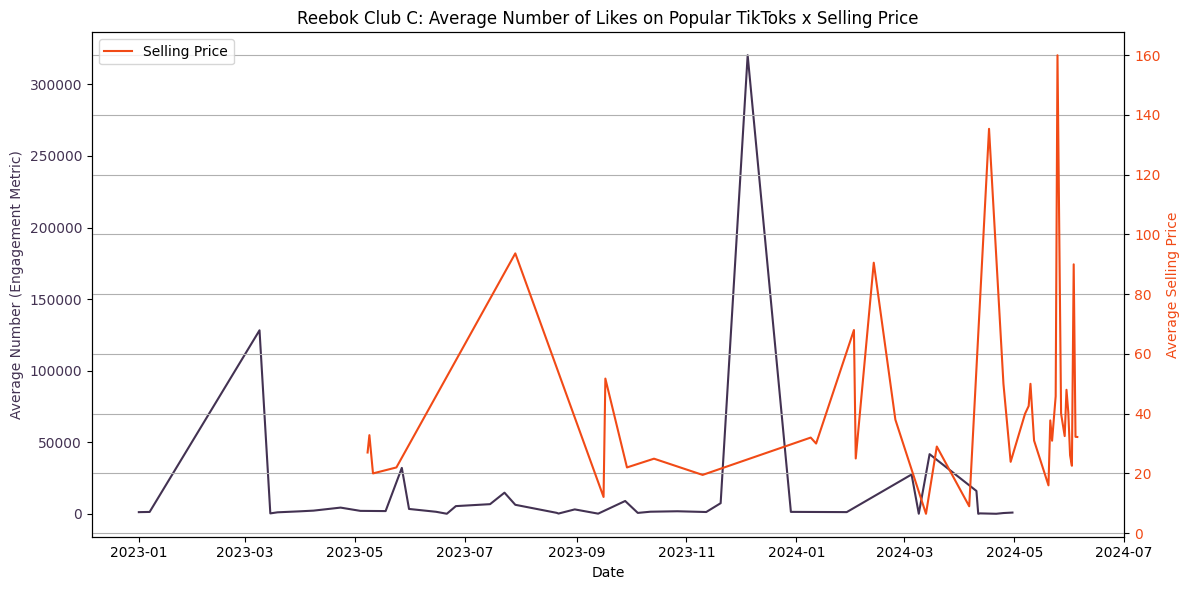

In [132]:
# Group by 'posted date' and sum the 'likes', 'comments', and 'views'
aggregated_df = rc_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

agg_listings = rc_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Collect the data to the driver
result_data = aggregated_df.sort("posted_date").toPandas()
result_data['posted_date'] = pd.to_datetime(result_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = datetime.date(2023, 1, 1)

# date_range = pd.date_range(start='2024-01-01', end='2024-06-06', freq='D').strftime('%Y-%m-%d')
result_data = result_data[result_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))
color = '#433252'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Number (Engagement Metric)', color=color)
ax1.plot(result_data['posted_date'], result_data['mean_likes'], color=color, label='Likes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = '#F14A16'
ax2.set_ylabel('Average Selling Price', color=color)
ax2.plot(listings_data['posted_date'], listings_data['mean_selling_price'], color=color, label='Selling Price')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Reebok Club C: Average Number of Likes on Popular TikToks x Selling Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

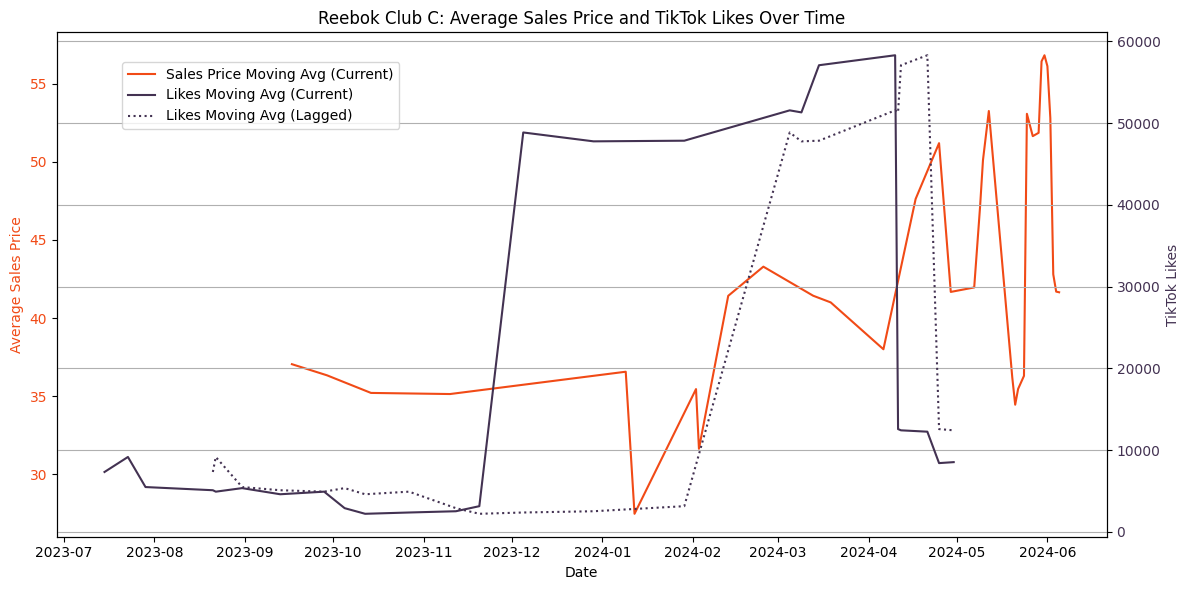

In [138]:
# Group by 'posted date' and average the 'likes', 'comments', and 'views'
aggregated_df = rc_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

# Group by 'posted date' and average the selling price
agg_listings = rc_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Sort the TikTok data
tiktok_data = aggregated_df.sort("posted_date").toPandas()
tiktok_data['posted_date'] = pd.to_datetime(tiktok_data['posted_date'])

# Sort Mercari data
listings_data = agg_listings.sort('posted_date').toPandas()
listings_data['posted_date'] = pd.to_datetime(listings_data['posted_date'])

start_date = listings_data.iloc[1:,:]['posted_date'].min().date()
tiktok_data = tiktok_data[tiktok_data['posted_date'].dt.date >= start_date]
listings_data = listings_data[listings_data['posted_date'].dt.date >= start_date]

# Calculate the moving average of sales prices
window_size = 7  # For example, a 7-day moving average
listings_data['moving_avg'] = listings_data['mean_selling_price'].rolling(window=window_size).mean()

# Calculate moving average for likes
window_size_likes = 7
tiktok_data['likes_moving_avg'] = tiktok_data['mean_likes'].rolling(window=window_size_likes).mean()

# Calculate lagged moving average for likes
lag_periods_likes = 3
tiktok_data['likes_lagged_moving_avg'] = tiktok_data['likes_moving_avg'].shift(lag_periods_likes)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sales prices moving averages
color = '#F14A16'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Sales Price', color=color)
ax1.plot(listings_data.posted_date, listings_data['moving_avg'], label='Sales Price Moving Avg (Current)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the likes data
ax2 = ax1.twinx()
color = '#433252'
ax2.set_ylabel('TikTok Likes', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_moving_avg'], label='Likes Moving Avg (Current)', color=color)
ax2.plot(tiktok_data.posted_date, tiktok_data['likes_lagged_moving_avg'], label='Likes Moving Avg (Lagged)', linestyle=':', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Reebok Club C: Average Sales Price and TikTok Likes Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)

# Show plot
plt.show()

# Join Listings Data with TikTok Data

## Correlation Heatmap for Adidas Sambas

In [162]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Aggregating TikTok data
aggregated_df = as_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

# Aggregating listing data
agg_listings = as_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Define a window spec for moving average
window_spec = Window.orderBy("posted_date").rowsBetween(-6, 0)  # 7-day window

# Moving average for selling prices
agg_listings = agg_listings.withColumn(
    "selling_price_moving_avg",
    F.avg("mean_selling_price").over(window_spec)
)

# Moving average for likes
aggregated_df = aggregated_df.withColumn(
    "likes_moving_avg",
    F.avg("mean_likes").over(window_spec)
)

# Lagged moving average for likes, using a shift of 3 days
lag_days = 3
aggregated_df = aggregated_df.withColumn(
    "likes_lagged_moving_avg",
    F.lag("likes_moving_avg", lag_days).over(Window.orderBy("posted_date"))
)

# Joining the dataframes on 'posted_date'
as_joined_df = agg_listings.join(
    aggregated_df,
    on='posted_date',
    how='inner'
)

as_joined_df.printSchema()
as_joined_df.show(5)

numerical_cols = ['mean_selling_price', 'selling_price_moving_avg','likes_moving_avg', 'likes_lagged_moving_avg', 'mean_likes', 'mean_comments', 'mean_saves', 'mean_shares', 'mean_views']

# Assemble the numeric columns into a vector
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
df_vector = assembler.transform(as_joined_df).select("features")

# Compute the correlation matrix
matrix = Correlation.corr(df_vector, "features").head()

# Extract the correlation matrix as a numpy array
correlation_matrix = matrix[0].toArray()

root
 |-- posted_date: date (nullable = true)
 |-- mean_selling_price: double (nullable = true)
 |-- selling_price_moving_avg: double (nullable = true)
 |-- mean_likes: double (nullable = true)
 |-- mean_comments: double (nullable = true)
 |-- mean_saves: double (nullable = true)
 |-- mean_views: double (nullable = true)
 |-- mean_shares: double (nullable = true)
 |-- likes_moving_avg: double (nullable = true)
 |-- likes_lagged_moving_avg: double (nullable = true)

+-----------+------------------+------------------------+----------+-------------+----------+----------+-----------+------------------+-----------------------+
|posted_date|mean_selling_price|selling_price_moving_avg|mean_likes|mean_comments|mean_saves|mean_views|mean_shares|  likes_moving_avg|likes_lagged_moving_avg|
+-----------+------------------+------------------------+----------+-------------+----------+----------+-----------+------------------+-----------------------+
| 2024-03-12|              74.0|                  

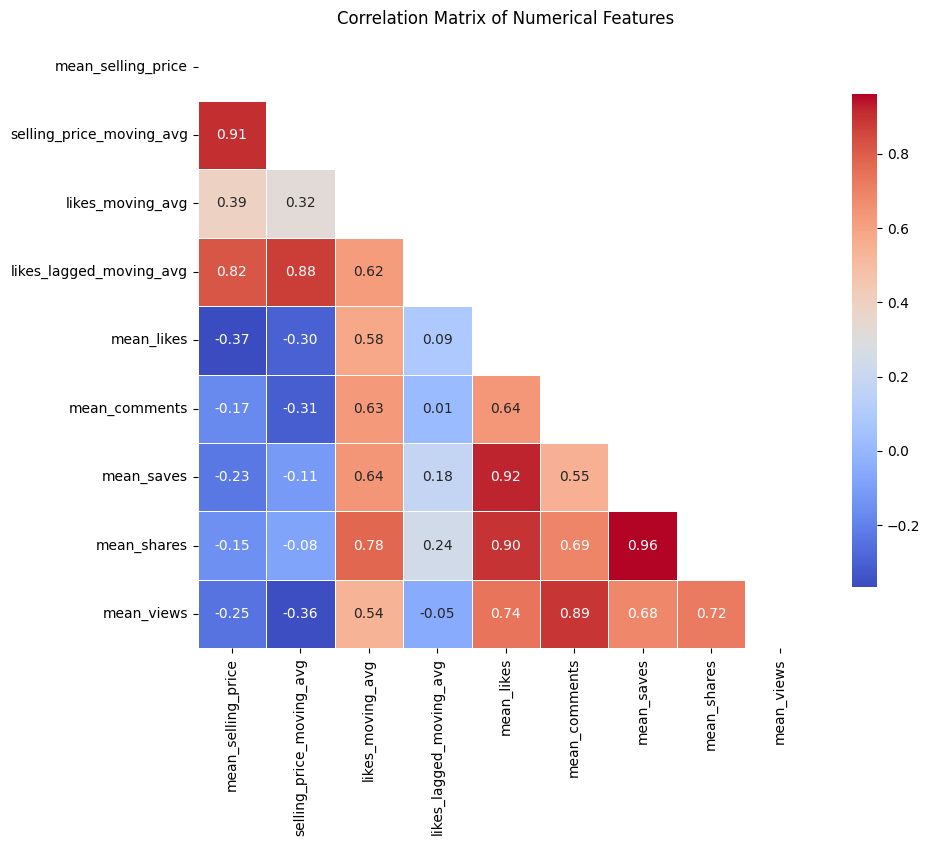

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, xticklabels=numerical_cols, yticklabels=numerical_cols)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Very high correlation (0.88) between selling price moving average and lagged TikTok likes moving average

## Correlation Heatmap for Adidas Campus 00s

In [160]:
# Aggregating TikTok data
aggregated_df = ac_tiktok.groupBy("posted_date").agg(
    F.mean("likes").alias("mean_likes"),
    F.mean("comments").alias("mean_comments"),
    F.mean("saves").alias("mean_saves"),
    F.mean("views").alias("mean_views"),
    F.mean("shares").alias("mean_shares")
)

# Aggregating listing data
agg_listings = ac_listings.groupBy('posted_date').agg(
    F.mean('selling price').alias('mean_selling_price')
)

# Define a window spec for moving average
window_spec = Window.orderBy("posted_date").rowsBetween(-6, 0)  # 7-day window

# Moving average for selling prices
agg_listings = agg_listings.withColumn(
    "selling_price_moving_avg",
    F.avg("mean_selling_price").over(window_spec)
)

# Moving average for likes
aggregated_df = aggregated_df.withColumn(
    "views_moving_avg",
    F.avg("mean_views").over(window_spec)
)

# Lagged moving average for likes, using a shift of 3 days
lag_days = 3
aggregated_df = aggregated_df.withColumn(
    "views_lagged_moving_avg",
    F.lag("views_moving_avg", lag_days).over(Window.orderBy("posted_date"))
)

# Joining the dataframes on 'posted_date'
ac_joined_df = agg_listings.join(
    aggregated_df,
    on='posted_date',
    how='inner'
)

ac_joined_df.printSchema()
ac_joined_df.show(5)

numerical_cols = ['mean_selling_price', 'selling_price_moving_avg','views_moving_avg', 'views_lagged_moving_avg', 'mean_likes', 'mean_comments', 'mean_saves', 'mean_shares', 'mean_views']

# Assemble the numeric columns into a vector
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="features")
df_vector = assembler.transform(ac_joined_df).select("features")

# Compute the correlation matrix
matrix = Correlation.corr(df_vector, "features").head()

# Extract the correlation matrix as a numpy array
correlation_matrix = matrix[0].toArray()

root
 |-- posted_date: date (nullable = true)
 |-- mean_selling_price: double (nullable = true)
 |-- selling_price_moving_avg: double (nullable = true)
 |-- mean_likes: double (nullable = true)
 |-- mean_comments: double (nullable = true)
 |-- mean_saves: double (nullable = true)
 |-- mean_views: double (nullable = true)
 |-- mean_shares: double (nullable = true)
 |-- views_moving_avg: double (nullable = true)
 |-- views_lagged_moving_avg: double (nullable = true)

+-----------+------------------+------------------------+----------+-------------+----------+----------+-----------+------------------+-----------------------+
|posted_date|mean_selling_price|selling_price_moving_avg|mean_likes|mean_comments|mean_saves|mean_views|mean_shares|  views_moving_avg|views_lagged_moving_avg|
+-----------+------------------+------------------------+----------+-------------+----------+----------+-----------+------------------+-----------------------+
| 2024-04-14|             99.27|      113.82285714

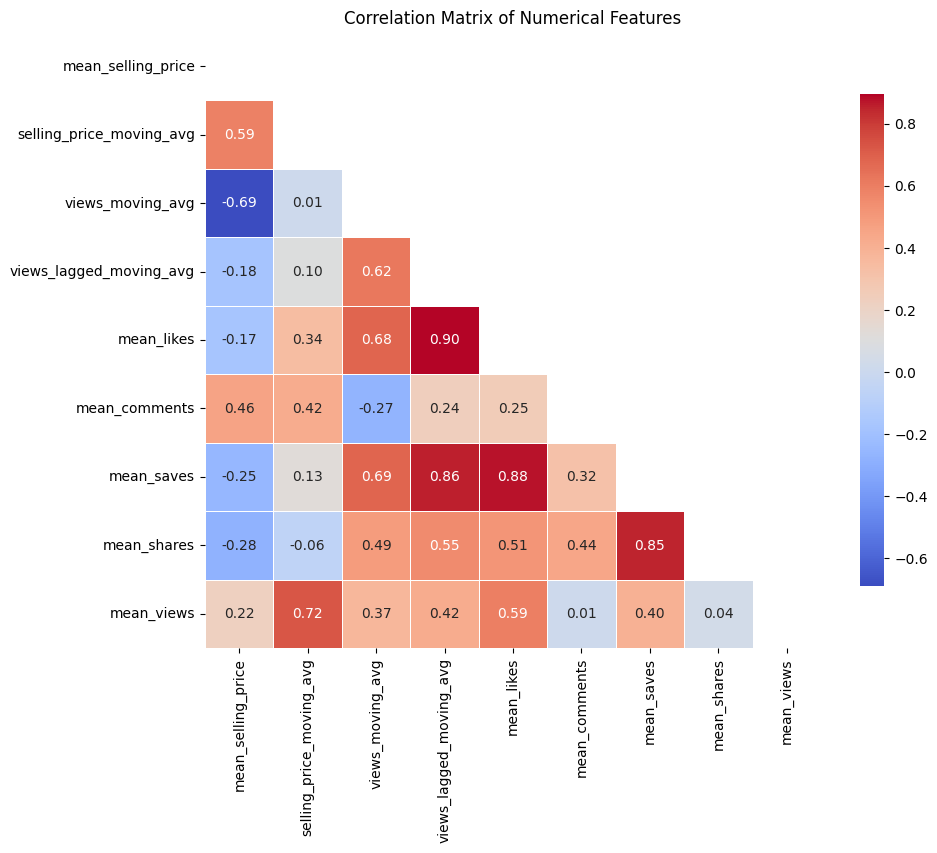

In [161]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, xticklabels=numerical_cols, yticklabels=numerical_cols)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Modeling Listing Data Against Date Features

## Adidas Sambas

In [166]:
from pyspark.sql.functions import year, month, dayofweek, dayofmonth, weekofyear


# Add date features to DataFrame
as_joined_df = as_joined_df.withColumn("year", year("posted_date"))
as_joined_df = as_joined_df.withColumn("month", month("posted_date"))
as_joined_df = as_joined_df.withColumn("day_of_week", dayofweek("posted_date"))
as_joined_df = as_joined_df.withColumn("day_of_month", dayofmonth("posted_date"))
as_joined_df = as_joined_df.withColumn("week_of_year", weekofyear("posted_date"))

from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Index categorical columns to prepare for RandomForest
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index")
    for column in ["month", "day_of_week"]
]

# Assemble all the features into one vector
assembler = VectorAssembler(inputCols=["year", "month_index", "day_of_week_index", "day_of_month", "week_of_year",
                                       "likes_moving_avg", "likes_lagged_moving_avg",
                                       "mean_views", "mean_comments", "mean_shares", "mean_saves"], outputCol="features")

from pyspark.ml.regression import RandomForestRegressor

# Configure the RandomForestRegressor
rf = RandomForestRegressor(featuresCol="features", labelCol="mean_selling_price")

# Build the pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Fit the model
as_model = pipeline.fit(as_joined_df)



In [167]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions
predictions = as_model.transform(as_joined_df)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="mean_selling_price", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol="mean_selling_price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("R-squared on test data =", r2)
print("Root Mean Squared Error (RMSE) on test data =", rmse)


R-squared on test data = 0.8519610462548695
Root Mean Squared Error (RMSE) on test data = 10.177111908369696


In [168]:
as_model.stages[-1].featureImportances

SparseVector(11, {1: 0.2707, 2: 0.0025, 3: 0.082, 4: 0.1044, 5: 0.0155, 6: 0.3915, 7: 0.0231, 8: 0.005, 9: 0.1017, 10: 0.0037})

In [172]:
## Generate a test dataset for the month of June

# Generate the date range
dates = pd.date_range(start='2024-06-01', end='2024-06-30', freq='D')
df = pd.DataFrame({
    'date': dates,
    'mean_likes': np.random.randint(1000, 10000, size=len(dates)),
    'mean_views': np.random.randint(200000, 1000000, size=len(dates)),
    'mean_comments': np.random.randint(1000, 10000, size=len(dates)),
    'mean_shares': np.random.randint(500, 5000, size=len(dates)),
    'mean_saves': np.random.randint(500, 5000, size=len(dates))
})

# Create Spark DataFrame
sdf = spark.createDataFrame(df)

# Define the window specification for a 7-day moving average
window_spec = Window.orderBy("date").rowsBetween(-6, 0)

# Calculate the 7-day moving average of 'mean_likes'
sdf = sdf.withColumn("likes_moving_avg", F.avg("mean_likes").over(window_spec))

# Define the window specification for lag
lag_window_spec = Window.orderBy("date")

# Calculate the 3-day lag of the moving average
sdf = sdf.withColumn("likes_lagged_moving_avg", F.lag("likes_moving_avg", 3).over(lag_window_spec))

# Additional columns based on the date
sdf = sdf.withColumn("year", F.year("date"))
sdf = sdf.withColumn("month_index", F.month("date"))
sdf = sdf.withColumn("day_of_week_index", F.dayofweek("date"))
sdf = sdf.withColumn("day_of_month", F.dayofmonth("date"))
sdf = sdf.withColumn("week_of_year", F.weekofyear("date"))

sdf.show()

+-------------------+----------+----------+-------------+-----------+----------+------------------+-----------------------+----+-----------+-----------------+------------+------------+
|               date|mean_likes|mean_views|mean_comments|mean_shares|mean_saves|  likes_moving_avg|likes_lagged_moving_avg|year|month_index|day_of_week_index|day_of_month|week_of_year|
+-------------------+----------+----------+-------------+-----------+----------+------------------+-----------------------+----+-----------+-----------------+------------+------------+
|2024-06-01 00:00:00|      8754|    822767|         9500|       1883|      3652|            8754.0|                   null|2024|          6|                7|           1|          22|
|2024-06-02 00:00:00|      5814|    818065|         8686|       4617|      1226|            7284.0|                   null|2024|          6|                1|           2|          22|
|2024-06-03 00:00:00|      9783|    216589|         9773|       1161|      

In [174]:
predictions = as_model.transform(sdf.dropna())

# Show the predictions along with desired columns
predictions.select("features", "prediction", "date").show()

+--------------------+-----------------+-------------------+
|            features|       prediction|               date|
+--------------------+-----------------+-------------------+
|[2024.0,6.0,3.0,4...|81.00116666666668|2024-06-04 00:00:00|
|[2024.0,6.0,4.0,5...|            87.16|2024-06-05 00:00:00|
|[2024.0,6.0,5.0,6...|80.55116666666667|2024-06-06 00:00:00|
|[2024.0,6.0,6.0,7...|80.55116666666667|2024-06-07 00:00:00|
|[2024.0,6.0,7.0,8...|80.50116666666668|2024-06-08 00:00:00|
|[2024.0,6.0,1.0,9...|            87.16|2024-06-09 00:00:00|
|[2024.0,6.0,2.0,1...|            80.22|2024-06-10 00:00:00|
|[2024.0,6.0,3.0,1...|80.50116666666668|2024-06-11 00:00:00|
|[2024.0,6.0,4.0,1...|80.55116666666667|2024-06-12 00:00:00|
|[2024.0,6.0,5.0,1...|80.15116666666668|2024-06-13 00:00:00|
|[2024.0,6.0,6.0,1...|79.67616666666667|2024-06-14 00:00:00|
|[2024.0,6.0,7.0,1...|86.33500000000001|2024-06-15 00:00:00|
|[2024.0,6.0,1.0,1...|79.67616666666667|2024-06-16 00:00:00|
|[2024.0,6.0,2.0,1...|  

In [177]:
# Convert Spark DataFrame to Pandas DataFrame

pandas_df = predictions.select("prediction").toPandas()

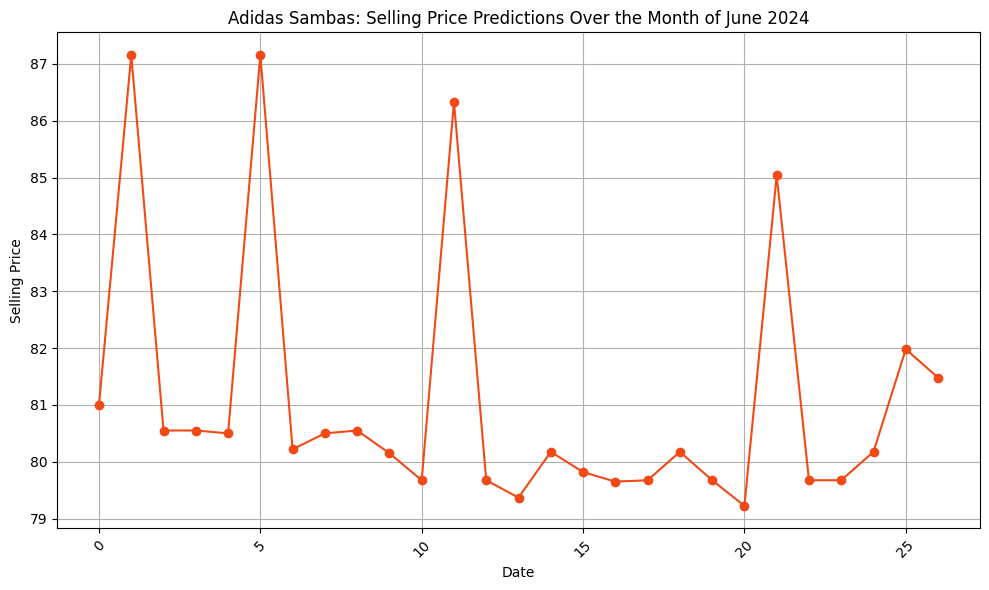

In [181]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(pandas_df.index, pandas_df['prediction'], marker='o', linestyle='-', color='#F14A16')
plt.title('Adidas Sambas: Selling Price Predictions Over the Month of June 2024')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust subplot parameters to give the plot a nice layout
plt.show()